In [2]:
%%bash
start-dfs.sh

Starting namenodes on [localhost]
Starting datanodes
Starting secondary namenodes [ubuntu]


In [3]:
datos=spark.read.json("hdfs://localhost:9000/uni/estudiantes.json")

In [4]:
datos=datos.drop("_id")

In [5]:
datos.show(n=2,truncate=False,vertical=True)

-RECORD 0--------------------------------
 apellidos | Sebastian Garcia            
 edad      | 23                          
 email     | Valeria.Sebastian@yahoo.com 
 nombre    | Valeria                     
 nota      | 7.56                        
-RECORD 1--------------------------------
 apellidos | Sanchez Abascal             
 edad      | 23                          
 email     | Sanchez.Abascal@gmail.com   
 nombre    | Emma                        
 nota      | 8.16                        
only showing top 2 rows



In [6]:
datos.printSchema()

root
 |-- apellidos: string (nullable = true)
 |-- edad: long (nullable = true)
 |-- email: string (nullable = true)
 |-- nombre: string (nullable = true)
 |-- nota: double (nullable = true)



In [7]:
datos.count()

10000

In [8]:
#notas medias por edades

In [9]:
medias=datos.groupBy("edad").avg("nota").orderBy("edad")

medias.show(n=3)

+----+------------------+
|edad|         avg(nota)|
+----+------------------+
|  18| 7.935931528662416|
|  19|7.9874188034187945|
|  20| 7.920192791282483|
+----+------------------+
only showing top 3 rows



Coeficiente de correlación de Pearson
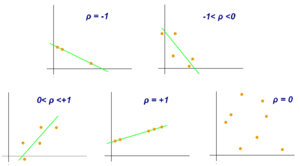

In [15]:
medias.corr("edad","avg(nota)")

-0.016854506222505408

In [16]:
datos.corr("edad","nota")

0.005886539809113119

In [10]:
%%bash
stop-dfs.sh

Stopping namenodes on [localhost]
Stopping datanodes
Stopping secondary namenodes [ubuntu]
